# Analyzing IMDb Movie Genres: Optimal Clustering, Rating Patterns, and Predictive Model Evaluation
**GROUP 03 _ DATA102 S13**

Members:
- Bacar, Jedrek Juan Rephael A.
- De Silva, Wayne FLossien T.
- Llenado, Lexandra Mitchelle D.

## INTRODUCTION

Movies have had a global impact on society, possessing the power to convey stories that evoke a range of emotions, offer diverse perspectives, and provide insights into different cultures. Beyond storytelling, movies can be a source of comfort during solitary moments and can also bring people together. They have a significant influence on our social norms and generate substantial revenue, demonstrating their economic impact on various industries.

Given this, the competition within the movie industry is intense, and its dynamics are often unpredictable. Understanding the trends and behaviors of movies is a complex task. In this study, we will explore various factors influencing movie algorithms on IMDb, aiming to gain insights into the elements that drive success in this competitive landscape.

## IMPORTING LIBRARIES

In [1]:
!pip install pyfim

  Using cached pyfim-6.28.tar.gz (357 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pyfim


  error: subprocess-exited-with-error
  
  × Building wheel for pyfim (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyfim
ERROR: Could not build wheels for pyfim, which is required to install pyproject.toml-based projects

[notice] A new release of pip is available: 23.3 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install apyori


[notice] A new release of pip is available: 23.3 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from fim import arules, apriori, fpgrowth
from mlxtend.frequent_patterns import fpgrowth
from apyori import apriori

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

ModuleNotFoundError: No module named 'fim'

## THE DATASET

This dataset contains detailed information about movies listed on IMDb, including titles, genres, release dates, and ratings. It also includes user reviews and ratings, making it an excellent resource for sentiment analysis and trend analysis in the movie industry. This dataset can be used to gain insights into movie trends, audience preferences, and the correlation between movie attributes and ratings.

In [3]:
df = pd.read_csv('IMDb_Dataset.csv')
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0


## EXPLORATORY DATA ANALYSIS

Before we delve into the various factors influencing the movie algorithm on IMDb, it's essential to thoroughly understand the dataset we'll be using. We need to explore and analyze its features to ensure that we can effectively use this data in our study.

In [4]:
df.describe()

,IMDb Rating,Year,MetaScore,Duration (minutes)
count,3173.000000,3173.000000,3173.000000,3173.000000
mean,6.931012,2004.958399,65.993066,116.304822
std,0.805202,16.819985,11.358619,22.123032
min,3.900000,1917.000000,20.000000,46.000000
25%,6.400000,1997.000000,64.000000,105.000000
50%,6.900000,2010.000000,66.000000,116.300000
75%,7.500000,2017.000000,69.000000,122.000000
max,9.500000,2025.000000,100.000000,317.000000


Text(0, 0.5, 'Frequency')

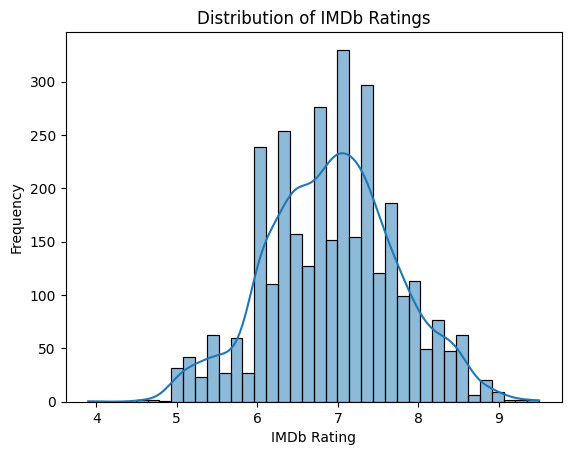

In [5]:
# IMDb Rating Distribution
sns.histplot(df['IMDb Rating'], kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')

The chart above is a histogram which shows the distribution of IMDb Ratings. Wherein Y-Axis shows the frequency or count and the X-Axis is for the range of IMDb Ratings that are present in the dataset. The ratings range from 4 - 9.5 and the most noticeable would be that it is unimodal where the peak is around the rating of 7. The smooth curve which is the kernel density estimate emphasizes this even more with the peak curve being around the same area. There is a slight skewness to the right.

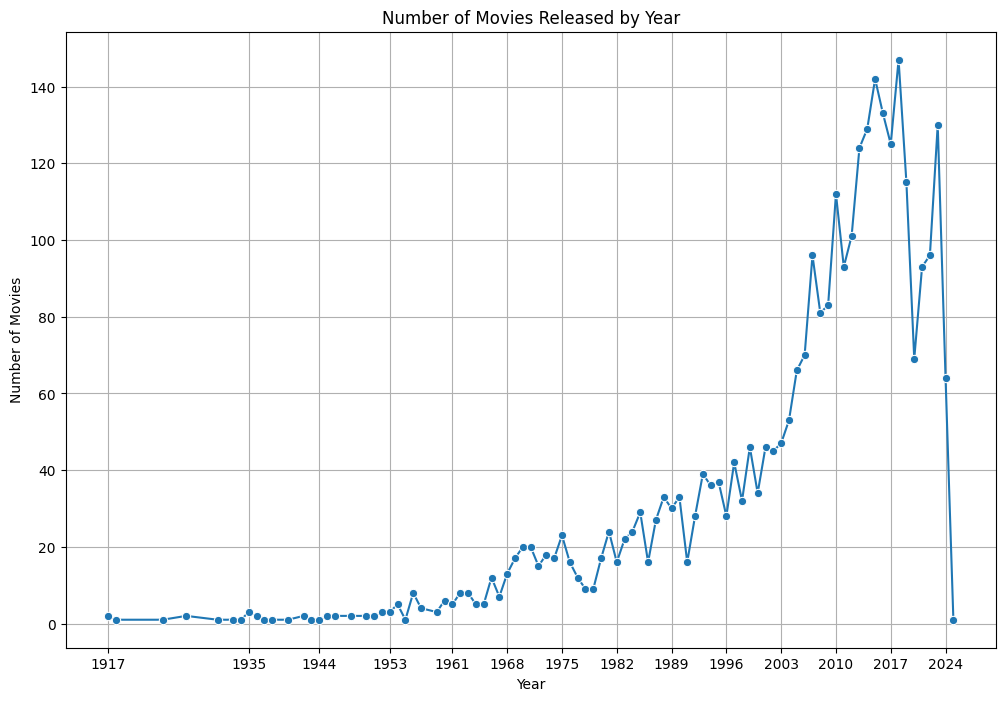

In [6]:
# Counting the number of movies released each year
year_counts = df['Year'].value_counts().sort_index()

# Creating 12 labels to see better the year
labels = max(1, len(year_counts) // 12)
x_ticks = year_counts.index[::labels]

# Creating the line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')

# Set the title and labels
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Set the X-axis labels
plt.xticks(ticks=x_ticks, rotation=0)

# Enable the grid
plt.grid(True)

# Show the plot
plt.show()

The chart above is a line chart which shows the number of movies released each year. Wherein Y-Axis shows the frequency or count and the X-Axis is used for the year. The trend shows a upward trajectory starting the 1960 range onwards where we can see a sharper increase after the year 2000. It then consistently stays within the 90-140 range from 2010 - 2019 where we suddenly see a slight drop in frequency during the years 2020-2022 which may be due to COVID-19 and a difficulty in movie production. It returns to normal in 2023 staying at 130 and in 2024 there is a lower count due to the year being in progress. 

In [7]:
# Sort by MetaScore from highest to lowest
df_sortedmeta = df.sort_values(by='MetaScore', ascending=False)
df_sortedmeta

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
694,Lawrence of Arabia,8.3,1962,PG,Adventure,David Lean,Peter O'TooleAlec GuinnessAnthony Quinn,100.0,https://m.media-amazon.com/images/M/MV5BYWY5Zj...,218.0
3123,Rear Window,8.5,1954,PG,Mystery,Alfred Hitchcock,James StewartGrace KellyWendell Corey,100.0,https://m.media-amazon.com/images/M/MV5BNGUxYW...,112.0
3122,Casablanca,8.5,1942,PG,Drama,Michael Curtiz,Julius J. EpsteinPhilip G. EpsteinHoward Koch,100.0,https://m.media-amazon.com/images/M/MV5BY2IzZG...,102.0
3171,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,Mario PuzoFrancis Ford Coppola,100.0,https://m.media-amazon.com/images/M/MV5BM2MyNj...,175.0
3078,Lawrence of Arabia,8.3,1962,PG,Adventure,David Lean,Peter O'TooleAlec GuinnessAnthony Quinn,100.0,https://m.media-amazon.com/images/M/MV5BYWY5Zj...,218.0
...,...,...,...,...,...,...,...,...,...,...
74,Modigliani,7.2,2004,R,Biography,Mick Davis,Andy GarciaElsa ZylbersteinOmid Djalili,25.0,https://m.media-amazon.com/images/M/MV5BMTA1MD...,128.0
2008,Maximum Overdrive,5.4,1986,R,Action,Stephen King,Stephen King,24.0,https://m.media-amazon.com/images/M/MV5BZjc0ZD...,98.0
2336,One Man's Hero,6.0,1999,R,Action,Lance Hool,Tom BerengerJoaquim de AlmeidaDaniela Romo,24.0,https://m.media-amazon.com/images/M/MV5BMTg3OD...,121.0
1999,Hansel & Gretel: Witch Hunters,6.1,2013,R,Action,Tommy Wirkola,Jeremy RennerGemma ArtertonPeter Stormare,23.0,https://m.media-amazon.com/images/M/MV5BMjA4MD...,88.0


In [11]:
# Sort by IMDb Rating from highest to lowest
df_sortedimdb = df.sort_values(by='IMDb Rating', ascending=False)
df_sortedimdb

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
1710,Marty's Project,9.5,2010,R,Comedy,Andrew Kent,Naomi AshDavid BedfordJoanna Deering,66.0,https://m.media-amazon.com/images/M/MV5BM2U4Yz...,116.3
2100,The People's Story,9.5,2000,PG,Documentary,Steven Scaffidi,Daniel RadcliffeEmma WatsonRupert Grint,66.0,https://m.media-amazon.com/images/M/MV5BMjQ3MG...,56.0
3172,The Shawshank Redemption,9.3,1994,R,Drama,Frank Darabont,Tim RobbinsMorgan FreemanBob Gunton,82.0,https://m.media-amazon.com/images/M/MV5BNDE3OD...,142.0
2102,Loving Carmen,9.3,2016,G,Documentary,Nayo Titzin,Nayo Titzin,66.0,https://m.media-amazon.com/images/M/MV5BZTY5N2...,66.0
1344,Fuga dalla Morte,9.2,2023,R,Adventure,Michael Righini,Nicola AdobatiAndrea BaglioNicol Benvenuti,66.0,https://m.media-amazon.com/images/M/MV5BMDA5Nj...,116.3
...,...,...,...,...,...,...,...,...,...,...
930,Imaginary,4.7,2024,PG-13,Horror,Jeff Wadlow,DeWanda WiseTaegen BurnsPyper Braun,34.0,https://m.media-amazon.com/images/M/MV5BODIzOT...,104.0
880,Imaginary,4.7,2024,PG-13,Horror,Jeff Wadlow,DeWanda WiseTaegen BurnsPyper Braun,34.0,https://m.media-amazon.com/images/M/MV5BODIzOT...,104.0
935,Monster,4.6,2023,TV-MA,Horror,Rako Prijanto,Marsha TimothyAlex AbbadAnantya Kirana,66.0,https://m.media-amazon.com/images/M/MV5BZjIzN2...,86.0
885,Monster,4.6,2023,TV-MA,Horror,Rako Prijanto,Marsha TimothyAlex AbbadAnantya Kirana,66.0,https://m.media-amazon.com/images/M/MV5BZjIzN2...,86.0


The df_sortedimdb and df_sortedmeta are just to sort the movies based on their scores and for us to see the highest scores available.

C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


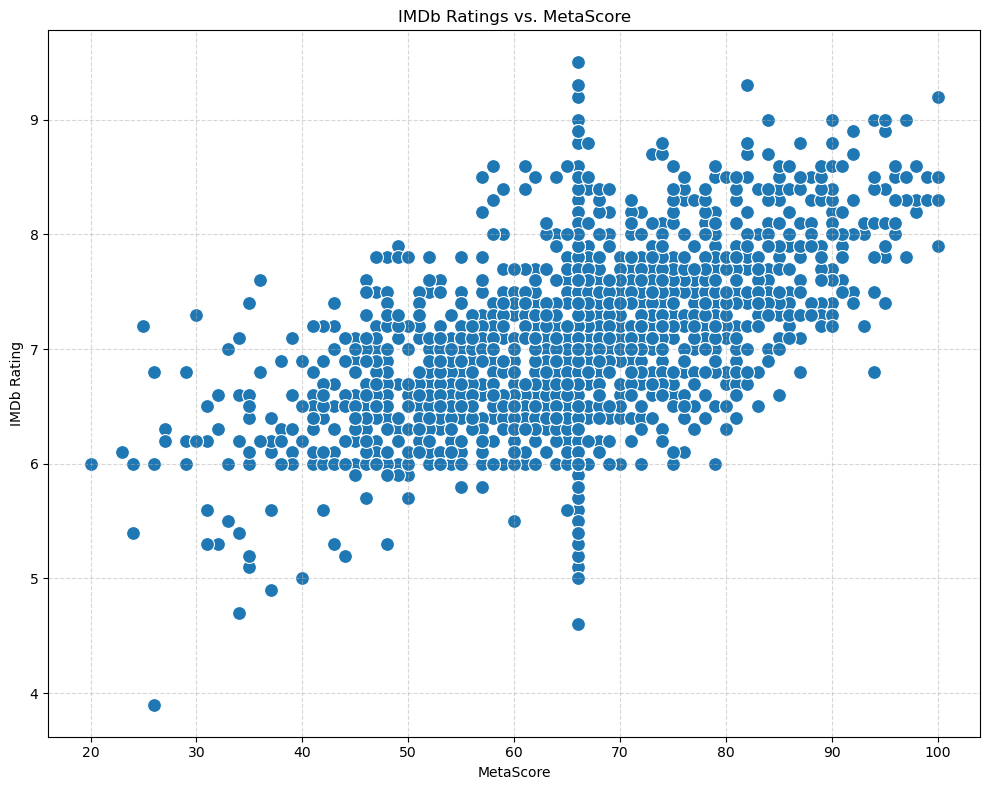

In [10]:
# Create the scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='MetaScore', y='IMDb Rating', 
                s=100,)

# Set plot title and labels
plt.title('IMDb Ratings vs. MetaScore')
plt.xlabel('MetaScore')
plt.ylabel('IMDb Rating')


# Show gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# Selecting relevant columns for a correlation matrix
correlation_columns = ['MetaScore', 'Duration (minutes)', 'Year', 'IMDb Rating']

# Computing the correaltion
correlation_df = df[correlation_columns].corr()

#Displaying the correlation
print(correlation_df)

                    MetaScore  Duration (minutes)      Year  IMDb Rating
MetaScore            1.000000            0.123072 -0.116401     0.439811
Duration (minutes)   0.123072            1.000000 -0.132043     0.212704
Year                -0.116401           -0.132043  1.000000    -0.053147
IMDb Rating          0.439811            0.212704 -0.053147     1.000000


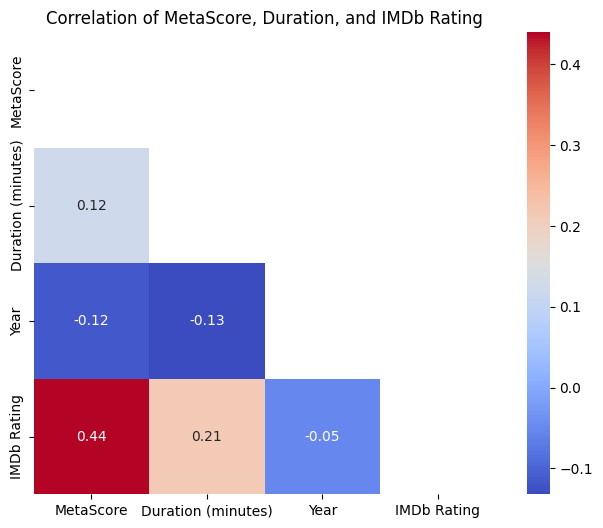

In [10]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_df, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask
sns.heatmap(correlation_df, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', square=True)

# Title and show plot
plt.title('Correlation of MetaScore, Duration, and IMDb Rating')
plt.show()

The chart above is a scatter plot which shows the relationship between the IMDb Ratings and MetaScores and another chart is a heat map correlation between 'MetaScore', 'Duration (minutes)', 'Year', 'IMDb Rating'. Our main focus here would be towards the relationship between 'MetaScore' , and 'IMDb Rating'. For the scatterplot the Y-Axis is the 'IMDb Rating' and the X-Axis is the 'MetaScore' the point which represents a movie shows the score that it gets from both axes. There is a positive correlation between the 'IMDb Rating' and 'MetaScore' where if one increases the other will follow suit. The majority of the data points are clustered between 'MetaScore' of 40 to 80 and 'IMDb Rating' of 6 to 8. The calculated correlation coefficient between the two variables further supports the claim with a score that indicates moderate positive correlation. Though the relationship is not very strong it does indicate that there is some kind of connection between the two.

C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


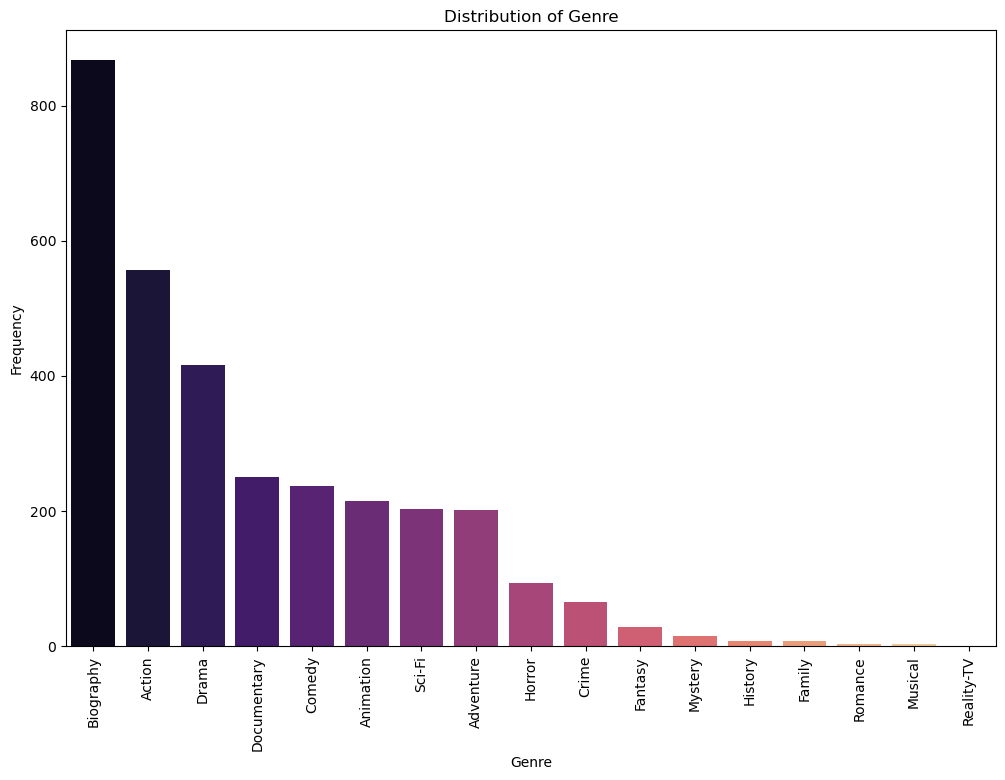

In [11]:
# Counting the number of movies released each year
genre_counts = df['Genre'].value_counts()

# Create a bar chart for Distribution of Genres
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

The Chart Above is a Bar Chart which shows the distribution of Genre. The X-Axis are the type of genres and the Y-Axis is the frequency or amount of time it shows up. In this case the most prominent genre would be Biography, Action, and Drama which are the top 3 and with quite a difference between each other. The next 5 genres are also quite close to each other in terms of frequency. 

## DATA PREPROCESSING

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3173 non-null   object 
 1   IMDb Rating         3173 non-null   float64
 2   Year                3173 non-null   int64  
 3   Certificates        3173 non-null   object 
 4   Genre               3173 non-null   object 
 5   Director            3173 non-null   object 
 6   Star Cast           3173 non-null   object 
 7   MetaScore           3173 non-null   float64
 8   Poster-src          3173 non-null   object 
 9   Duration (minutes)  3173 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 248.0+ KB


In [13]:
df.shape

(3173, 10)

In [14]:
df.dtypes

Title                  object
IMDb Rating           float64
Year                    int64
Certificates           object
Genre                  object
Director               object
Star Cast              object
MetaScore             float64
Poster-src             object
Duration (minutes)    float64
dtype: object

### Handling Missing Values

In [15]:
df.isna().sum()

Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Poster-src            0
Duration (minutes)    0
dtype: int64

We will not drop any null values as there are none present.

### Handling Duplicate Values

In [16]:
# Check if there are duplicates
df.duplicated().sum()

411

In [17]:
# Drop duplicates
df = df.drop_duplicates(keep='first')
df

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0
...,...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,R,Crime,Francis Ford Coppola,Francis Ford CoppolaMario Puzo,90.0,https://m.media-amazon.com/images/M/MV5BMWMwMG...,202.0
3167,12 Angry Men,9.0,1957,Approved,Crime,Sidney Lumet,Reginald Rose,97.0,https://m.media-amazon.com/images/M/MV5BMWU4N2...,96.0
3170,The Dark Knight,9.0,2008,PG-13,Action,Christopher Nolan,Jonathan NolanChristopher NolanDavid S. Goyer,84.0,https://m.media-amazon.com/images/M/MV5BMTMxNT...,152.0
3171,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,Mario PuzoFrancis Ford Coppola,100.0,https://m.media-amazon.com/images/M/MV5BM2MyNj...,175.0


In [18]:
# Checking if it is a duplicated title/row
specific_title = "End of the Spear"  

# Search for the row(s) with the specific title
specific_row = df[df['Title'] == specific_title]

specific_row

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0


### Drop Unnecessary Columns

In [19]:
# Drop columns that are not needed for the analysis
df = df.drop(['Director','Star Cast','Poster-src'], axis=1)

### PRE-PROCESSING FOR MODELING

In [20]:
df

,Title,IMDb Rating,Year,Certificates,Genre,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,45.0,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,75.0,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,79.0,99.0
4,Mahler,7.0,1974,PG,Biography,66.0,115.0
...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,R,Crime,90.0,202.0
3167,12 Angry Men,9.0,1957,Approved,Crime,97.0,96.0
3170,The Dark Knight,9.0,2008,PG-13,Action,84.0,152.0
3171,The Godfather,9.2,1972,R,Crime,100.0,175.0


In [21]:
# Create a LabelEncoder instance for 'Genre'
le_genre = LabelEncoder()

# Create a LabelEncoder instance for 'Certificates'
le_certificates = LabelEncoder()

# Fit the LabelEncoder instances to the original dataset
le_genre.fit(df['Genre'])
le_certificates.fit(df['Certificates'])

# Transform the 'Genre' and 'Certificates' columns of the new dataset
df['Genre'] = le_genre.transform(df['Genre'])
df['Certificates'] = le_certificates.transform(df['Certificates'])

# Display the updated DataFrame
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,6,1,45.0,108.0
1,Elvira Madigan,7.0,1967,5,3,66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,8,6,75.0,93.0
3,It Ain't Over,8.2,2022,5,6,79.0,99.0
4,Mahler,7.0,1974,5,3,66.0,115.0


In [22]:
# Create a dictionary to map numerical values to genre names
genre_dict = dict(zip(le_genre.classes_, le_genre.transform(le_genre.classes_)))
certificate_dict = dict(zip(le_certificates.classes_, le_certificates.transform(le_certificates.classes_)))

print("Genre Mapping:")
for genre, code in genre_dict.items():
    print(f"{genre}: {code}")

print("Certificate Mapping:")
for certificate, code in certificate_dict.items():
    print(f"{certificate}: {code}")

Genre Mapping:
Action: 0
Adventure: 1
Animation: 2
Biography: 3
Comedy: 4
Crime: 5
Documentary: 6
Drama: 7
Family: 8
Fantasy: 9
History: 10
Horror: 11
Musical: 12
Mystery: 13
Reality-TV: 14
Romance: 15
Sci-Fi: 16
Certificate Mapping:
Approved: 0
G: 1
M/PG: 2
NC-17: 3
Not Rated: 4
PG: 5
PG-13: 6
Passed: 7
R: 8
TV-14: 9
TV-G: 10
TV-MA: 11
TV-PG: 12
TV-Y7: 13
Unrated: 14
X: 15


In [23]:
class_distribution = df['Genre'].value_counts(normalize=True) # Calculate the proportion of each class in the target variable
print(class_distribution)

Genre
3     0.245836
0     0.174511
7     0.146271
6     0.085083
4     0.083273
16    0.073497
2     0.062998
1     0.060463
11    0.022810
5     0.022448
9     0.009413
13    0.005431
10    0.002534
8     0.002534
15    0.001448
12    0.001086
14    0.000362
Name: proportion, dtype: float64


In [24]:
# Count occurrences of each category
category_counts = df['Genre'].value_counts()

# Get the top 10 categories with the highest number of samples
top_10_categories = category_counts.head(10).index

# Filter the DataFrame to keep only the top 10 categories
df = df[df['Genre'].isin(top_10_categories)]
df

,Title,IMDb Rating,Year,Certificates,Genre,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,6,1,45.0,108.0
1,Elvira Madigan,7.0,1967,5,3,66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,8,6,75.0,93.0
3,It Ain't Over,8.2,2022,5,6,79.0,99.0
4,Mahler,7.0,1974,5,3,66.0,115.0
...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,8,5,90.0,202.0
3167,12 Angry Men,9.0,1957,0,5,97.0,96.0
3170,The Dark Knight,9.0,2008,6,0,84.0,152.0
3171,The Godfather,9.2,1972,8,5,100.0,175.0


In [25]:
class_distribution = df['Genre'].value_counts(normalize=True) # Calculate the proportion of each class in the target variable
print(class_distribution)

Genre
3     0.251575
0     0.178585
7     0.149685
6     0.087069
4     0.085217
16    0.075213
2     0.064468
1     0.061875
11    0.023342
5     0.022971
Name: proportion, dtype: float64


### DATA PREPROCESSING FOR CLUSTERING

In [26]:
df_encoded = pd.get_dummies(df, columns=['Genre'])
df_encoded

,Title,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_11,Genre_16
0,End of the Spear,6.8,2005,6,45.0,108.0,False,True,False,False,False,False,False,False,False,False
1,Elvira Madigan,7.0,1967,5,66.0,91.0,False,False,False,True,False,False,False,False,False,False
2,The Kid Stays in the Picture,7.3,2002,8,75.0,93.0,False,False,False,False,False,False,True,False,False,False
3,It Ain't Over,8.2,2022,5,79.0,99.0,False,False,False,False,False,False,True,False,False,False
4,Mahler,7.0,1974,5,66.0,115.0,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,8,90.0,202.0,False,False,False,False,False,True,False,False,False,False
3167,12 Angry Men,9.0,1957,0,97.0,96.0,False,False,False,False,False,True,False,False,False,False
3170,The Dark Knight,9.0,2008,6,84.0,152.0,True,False,False,False,False,False,False,False,False,False
3171,The Godfather,9.2,1972,8,100.0,175.0,False,False,False,False,False,True,False,False,False,False


In [27]:
# Drop the categorical columns since this can't be scaled
df_cluster = df_encoded.drop(['Title','Certificates'], axis=1)
df_cluster

,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_11,Genre_16
0,6.8,2005,45.0,108.0,False,True,False,False,False,False,False,False,False,False
1,7.0,1967,66.0,91.0,False,False,False,True,False,False,False,False,False,False
2,7.3,2002,75.0,93.0,False,False,False,False,False,False,True,False,False,False
3,8.2,2022,79.0,99.0,False,False,False,False,False,False,True,False,False,False
4,7.0,1974,66.0,115.0,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,9.0,1974,90.0,202.0,False,False,False,False,False,True,False,False,False,False
3167,9.0,1957,97.0,96.0,False,False,False,False,False,True,False,False,False,False
3170,9.0,2008,84.0,152.0,True,False,False,False,False,False,False,False,False,False
3171,9.2,1972,100.0,175.0,False,False,False,False,False,True,False,False,False,False


### DATA PREPROCESSING FOR ASSOCIATION RULE LEARNING

In [28]:
df_assoc = df.drop(['Certificates','MetaScore','Duration (minutes)'], axis=1)

In [29]:
df_assoc

,Title,IMDb Rating,Year,Genre
0,End of the Spear,6.8,2005,1
1,Elvira Madigan,7.0,1967,3
2,The Kid Stays in the Picture,7.3,2002,6
3,It Ain't Over,8.2,2022,6
4,Mahler,7.0,1974,3
...,...,...,...,...
3166,The Godfather Part II,9.0,1974,5
3167,12 Angry Men,9.0,1957,5
3170,The Dark Knight,9.0,2008,0
3171,The Godfather,9.2,1972,5


## CLUSTERING

### Choosing optimal number of clusters

In [30]:
scaler = MinMaxScaler()

scaled_vals = scaler.fit_transform(df_cluster)
df_scaled = pd.DataFrame(scaled_vals, columns=df_cluster.columns)
df_scaled

,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_11,Genre_16
0,0.517857,0.814815,0.3125,0.228782,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.553571,0.462963,0.5750,0.166052,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.607143,0.787037,0.6875,0.173432,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.767857,0.972222,0.7375,0.195572,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.553571,0.527778,0.5750,0.254613,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,0.910714,0.527778,0.8750,0.575646,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2695,0.910714,0.370370,0.9625,0.184502,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2696,0.910714,0.842593,0.8000,0.391144,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2697,0.946429,0.509259,1.0000,0.476015,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
sum_of_squared_errors = []
silhouette = []
chi = []
dbi = []

X = df_scaled
k_list = range(2, 15)
for k in k_list:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km = km.fit(X)
    sum_of_squared_errors.append(km.inertia_)

    labels = km.labels_
    silhouette.append(silhouette_score(X, labels, metric='euclidean'))
    chi.append(calinski_harabasz_score(X, labels))
    dbi.append(davies_bouldin_score(X, labels))

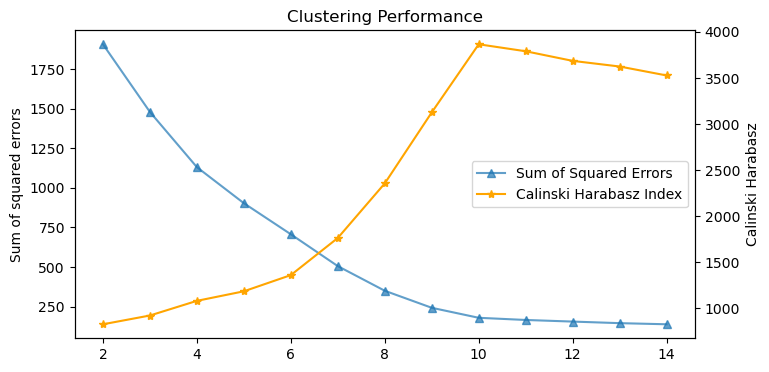

In [32]:
# For this graph, let's show Sum of Squared Error and Calinski Harabasz metrics.

alpha = 0.7
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
lns1 = ax.plot(k_list, sum_of_squared_errors, '^-', alpha=alpha, label='Sum of Squared Errors')
ax.set_ylabel('Sum of squared errors')
# plt.title('Elbow Method For Optimal k')
# ax.legend(loc=1)
ax.grid(False)

ax2 = ax.twinx()
ax2.set_ylabel('Calinski Harabasz')
ax2.grid(False)
lns2 = ax2.plot(k_list, chi, '*-', color='orange', label='Calinski Harabasz Index')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5)

plt.xlabel('k')
plt.title('Clustering Performance')
plt.show()

As illustrated in the graph, the elbow point for the sum of squared error is observed at 10. Additionally, the Calinski-Harabasz Index shows a peak at the same point, indicating strong cluster separation and suggesting that 10 is an optimal number of clusters.

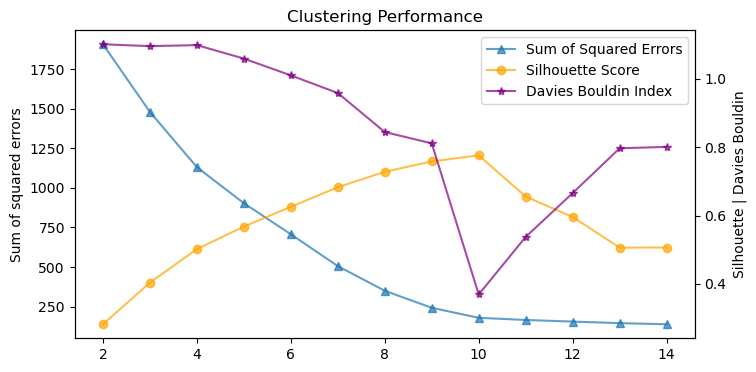

In [33]:
# For this graph, let's show Sum of Squared Error, Silhouette Score, and Davies Bouldin Index metrics.

alpha = 0.7
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
lns1 = ax.plot(k_list, sum_of_squared_errors, '^-', alpha=alpha, label='Sum of Squared Errors')
ax.set_ylabel('Sum of squared errors')
ax.grid(False)

ax2 = ax.twinx()
ax2.set_ylabel('Silhouette | Davies Bouldin')
ax2.grid(False)
lns2 = ax2.plot(k_list, silhouette, 'o-', color='orange', alpha=alpha, label='Silhouette Score')
lns3 = ax2.plot(k_list, dbi, '*-', color='purple', alpha=alpha, label='Davies Bouldin Index')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.xlabel('k')
plt.title('Clustering Performance')
plt.show()

The graph illustrates three metrics. The sum of squared error is depicted as in the previous graph, the Silhouette Score peaks at point 10, and the Davies-Bouldin Index reaches its lowest score at point 10, indicating optimal clustering at this point. The high Silhouette Score at point 10 suggests that the clusters are well-defined and distinct from each other, while the low Davies-Bouldin Index indicates that the clusters are compact and well-separated.

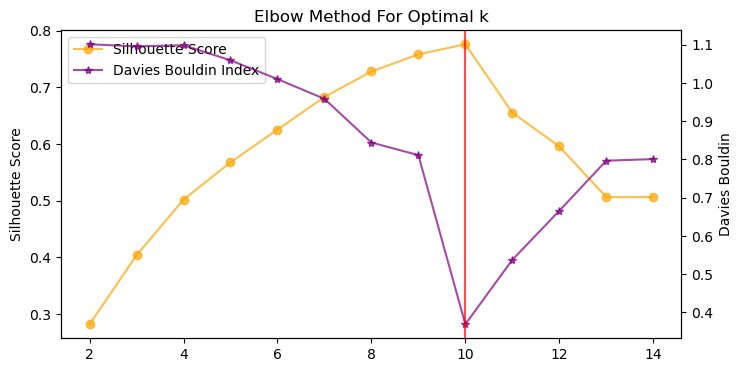

In [34]:
# For now, let's choose the best k using the Silhouette Score metric.

alpha = 0.7
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
lns1 = ax.plot(k_list, silhouette, 'o-', color='orange', alpha=alpha, label='Silhouette Score')
ax.set_ylabel('Silhouette Score')
ax.grid(False)

ax2 = ax.twinx()
ax2.set_ylabel('Davies Bouldin')
ax2.grid(False)
lns2 = ax2.plot(k_list, dbi, '*-', color='purple', alpha=alpha, label='Davies Bouldin Index')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.axvline(10, color='red', alpha=alpha)
plt.xlabel('k')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the findings, the optimal number of clusters k is 10. This conclusion is supported by the peak in the Silhouette Score and the lowest value of the Davies-Bouldin Index at k = 10, providing strong evidence for this optimal clustering.

##### Assigning cluster labels

In [35]:
# Cluster using K-means
k = 10
km = KMeans(n_clusters=k, random_state=42)
km.fit(df_scaled)
labels = km.predict(df_scaled)

# Create new dataframe with features and labels
df_labeled = df_encoded.copy()
df_labeled['cluster'] = labels

df_labeled

,Title,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_11,Genre_16,cluster
0,End of the Spear,6.8,2005,6,45.0,108.0,False,True,False,False,False,False,False,False,False,False,7
1,Elvira Madigan,7.0,1967,5,66.0,91.0,False,False,False,True,False,False,False,False,False,False,2
2,The Kid Stays in the Picture,7.3,2002,8,75.0,93.0,False,False,False,False,False,False,True,False,False,False,6
3,It Ain't Over,8.2,2022,5,79.0,99.0,False,False,False,False,False,False,True,False,False,False,6
4,Mahler,7.0,1974,5,66.0,115.0,False,False,False,True,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,8,90.0,202.0,False,False,False,False,False,True,False,False,False,False,9
3167,12 Angry Men,9.0,1957,0,97.0,96.0,False,False,False,False,False,True,False,False,False,False,9
3170,The Dark Knight,9.0,2008,6,84.0,152.0,True,False,False,False,False,False,False,False,False,False,1
3171,The Godfather,9.2,1972,8,100.0,175.0,False,False,False,False,False,True,False,False,False,False,9


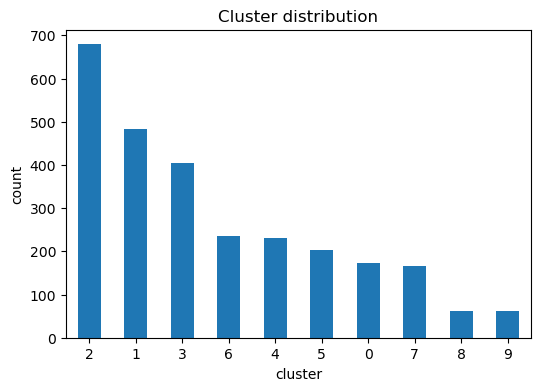

In [36]:
fig, ax = plt.subplots(1,1, figsize=(6,4), dpi=100)
df_labeled['cluster'].value_counts().plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.xlabel('cluster')
plt.title('Cluster distribution')
plt.show()

##### Interpreting our clusters

In [37]:
k = 10

for i in range(k):
    print(f'Cluster {i}')
    display(df_labeled[df_labeled['cluster']==i].describe())

Cluster 0


,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),cluster
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.0
mean,7.078161,2007.373563,6.137931,69.091954,104.644253,0.0
std,0.817429,14.029432,2.397843,9.814031,16.492109,0.0
min,5.000000,1961.000000,1.000000,40.000000,60.000000,0.0
25%,6.500000,2001.000000,5.000000,66.000000,93.000000,0.0
50%,7.100000,2012.000000,6.000000,66.000000,109.000000,0.0
75%,7.700000,2017.750000,8.000000,73.000000,116.300000,0.0
max,8.600000,2024.000000,13.000000,96.000000,160.000000,0.0


Cluster 1


,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),cluster
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.0
mean,6.803112,2007.087137,7.103734,62.811203,118.118672,1.0
std,0.841795,15.161798,1.417747,11.912521,18.849744,0.0
min,3.900000,1948.000000,0.000000,23.000000,50.000000,1.0
25%,6.200000,2001.000000,6.000000,58.000000,108.000000,1.0
50%,6.800000,2011.000000,8.000000,66.000000,116.300000,1.0
75%,7.300000,2018.000000,8.000000,66.000000,124.000000,1.0
max,9.000000,2025.000000,11.000000,98.000000,207.000000,1.0


Cluster 2


,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),cluster
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.0
mean,7.017968,2005.111929,6.721649,64.297496,120.239764,2.0
std,0.540868,15.555661,1.539256,12.552304,21.144750,0.0
min,6.000000,1927.000000,0.000000,25.000000,60.000000,2.0
25%,6.600000,1996.000000,6.000000,56.000000,107.000000,2.0
50%,7.000000,2009.000000,8.000000,66.000000,118.000000,2.0
75%,7.400000,2017.000000,8.000000,72.000000,129.000000,2.0
max,9.000000,2024.000000,11.000000,97.000000,260.000000,2.0


Cluster 3


,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),cluster
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.0
mean,6.838119,1999.962871,6.928218,66.626238,118.373515,3.0
std,0.837983,19.905013,1.815920,10.234055,23.624387,0.0
min,5.000000,1917.000000,0.000000,30.000000,51.000000,3.0
25%,6.200000,1989.750000,6.000000,66.000000,108.000000,3.0
50%,6.800000,2007.000000,8.000000,66.000000,116.300000,3.0
75%,7.400000,2015.000000,8.000000,66.000000,122.000000,3.0
max,9.300000,2024.000000,14.000000,100.000000,317.000000,3.0


Cluster 4


,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),cluster
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.0
mean,6.690435,2000.643478,7.191304,65.826087,112.052609,4.0
std,0.900313,20.935414,1.770183,8.730573,14.088862,0.0
min,5.000000,1931.000000,0.000000,33.000000,69.000000,4.0
25%,6.000000,1990.000000,6.250000,66.000000,104.000000,4.0
50%,6.600000,2009.000000,8.000000,66.000000,116.300000,4.0
75%,7.275000,2016.000000,8.000000,66.000000,116.300000,4.0
max,9.500000,2024.000000,15.000000,99.000000,189.000000,4.0


Cluster 5


,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),cluster
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.0
mean,6.533498,2005.044335,7.783251,66.019704,114.367980,5.0
std,0.853566,15.971602,1.049429,0.280745,8.974199,0.0
min,5.000000,1918.000000,4.000000,66.000000,47.000000,5.0
25%,5.900000,2002.000000,8.000000,66.000000,116.300000,5.0
50%,6.400000,2009.000000,8.000000,66.000000,116.300000,5.0
75%,7.150000,2015.000000,8.000000,66.000000,116.300000,5.0
max,8.600000,2022.000000,14.000000,70.000000,129.000000,5.0


Cluster 6


,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),cluster
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.0
mean,7.409787,2010.110638,5.880851,71.506383,98.528936,6.0
std,0.672371,12.162912,2.114928,9.030040,25.808370,0.0
min,5.000000,1945.000000,1.000000,43.000000,46.000000,6.0
25%,7.050000,2008.000000,5.000000,66.000000,85.000000,6.0
50%,7.500000,2013.000000,6.000000,66.000000,95.000000,6.0
75%,7.800000,2016.000000,8.000000,79.000000,113.000000,6.0
max,9.500000,2024.000000,8.000000,96.000000,266.000000,6.0


Cluster 7


,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),cluster
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.0
mean,6.858683,1998.724551,5.952096,65.431138,119.482036,7.0
std,0.836534,17.908625,2.096493,10.712271,23.259581,0.0
min,5.000000,1943.000000,0.000000,20.000000,51.000000,7.0
25%,6.300000,1985.500000,5.000000,62.500000,106.500000,7.0
50%,6.900000,2004.000000,6.000000,66.000000,116.300000,7.0
75%,7.300000,2014.000000,8.000000,66.000000,126.500000,7.0
max,9.200000,2024.000000,14.000000,100.000000,220.000000,7.0


Cluster 8


,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),cluster
count,63.000000,63.000000,63.000000,63.000000,63.00000,63.0
mean,6.471429,2009.539683,7.682540,64.873016,109.17619,8.0
std,0.976899,14.028572,1.830084,11.244342,12.14753,0.0
min,4.600000,1960.000000,3.000000,31.000000,75.00000,8.0
25%,5.650000,2006.000000,8.000000,66.000000,104.00000,8.0
50%,6.500000,2012.000000,8.000000,66.000000,116.30000,8.0
75%,7.000000,2021.000000,8.000000,66.000000,116.30000,8.0
max,8.500000,2024.000000,14.000000,97.000000,130.00000,8.0


Cluster 9


,IMDb Rating,Year,Certificates,MetaScore,Duration (minutes),cluster
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,7.050000,2000.306452,7.274194,68.274194,122.522581,9.0
std,1.108795,19.904352,1.747779,12.642848,27.446786,0.0
min,5.000000,1946.000000,0.000000,29.000000,80.000000,9.0
25%,6.125000,1991.250000,8.000000,66.000000,111.250000,9.0
50%,6.750000,2007.000000,8.000000,66.000000,116.300000,9.0
75%,8.250000,2015.000000,8.000000,74.250000,124.750000,9.0
max,9.200000,2024.000000,8.000000,100.000000,229.000000,9.0


##### Grouping

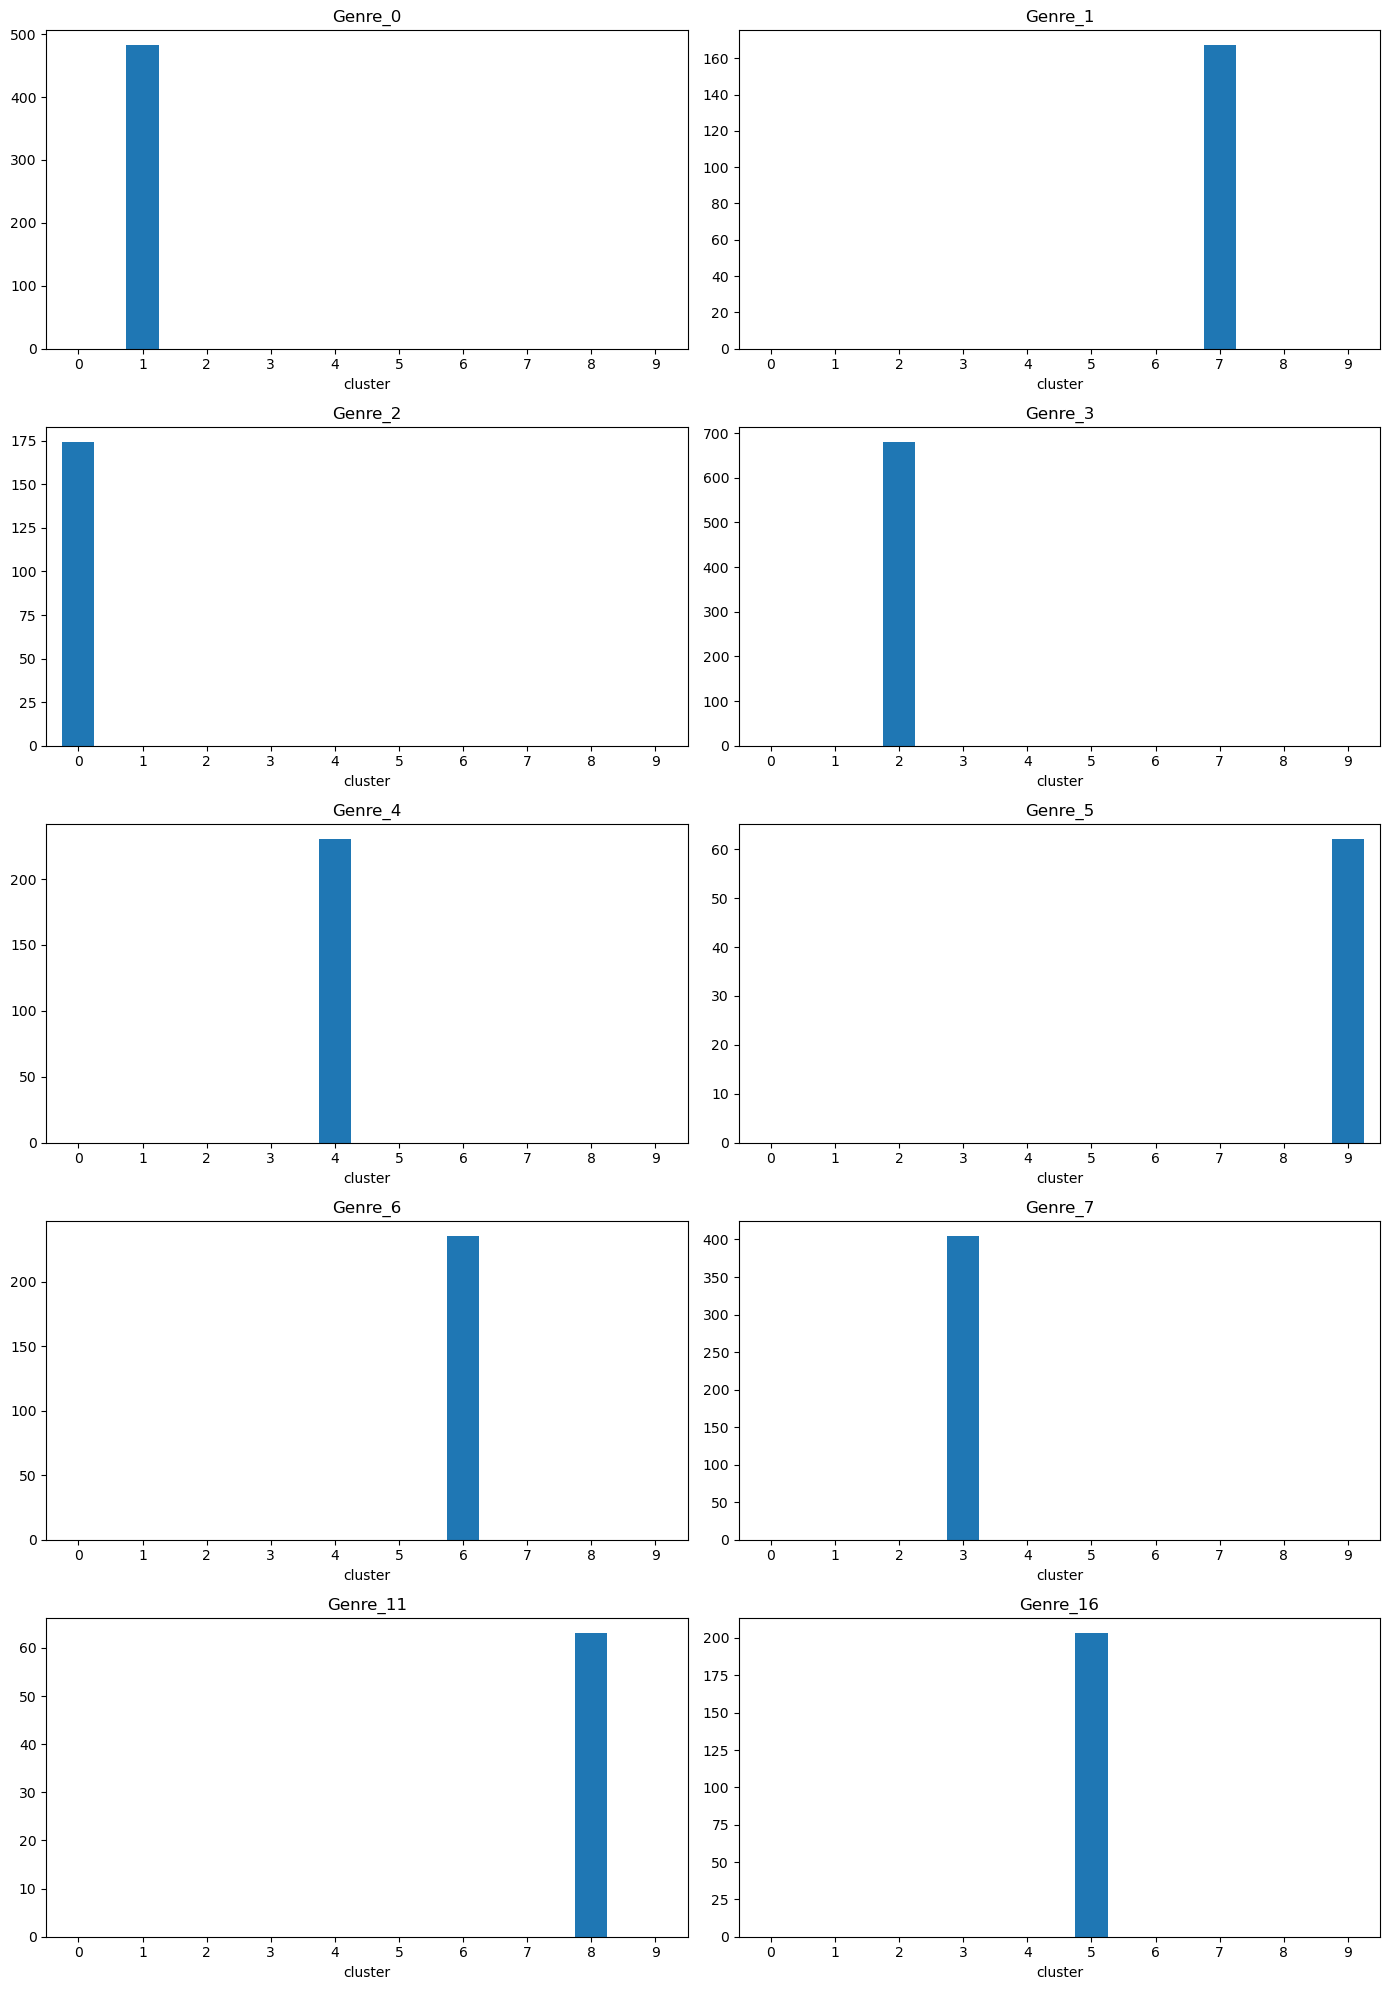

In [38]:
fig, ax = plt.subplots(5, 2, figsize=(14, 20), dpi=100)  # Adjust figsize to fit all plots
features = ['Genre_0', 'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6', 'Genre_7', 'Genre_11', 'Genre_16']

for index, feature in enumerate(features):
    row = index // 2
    col = index % 2
    grouped = df_labeled[[feature, 'cluster']].groupby('cluster').sum()
    grouped.plot(kind='bar', ax=ax[row, col], legend=False)
    ax[row, col].set_title(feature)
    ax[row, col].set_xticklabels(grouped.index.tolist(), rotation=0)

plt.tight_layout()
plt.show()

The clustering results indicate that the clusters are distinctly organized based on genre, with no overlap among them. Each cluster is associated with a single genre, highlighting a clear separation in the data.

- Cluster 0: Contains all data points from Genre 6.
- Cluster 1: Includes all data points from Genre 3.
- Cluster 2: Comprises all data points from Genre 0.
- Cluster 3: Encompasses all data points from Genre 7.
- Cluster 4: Holds all data points from Genre 16.
- Cluster 5: Features all data points from Genre 4.
- Cluster 6: Consists entirely of data points from Genre 1.
- Cluster 7: Represents all data points from Genre 2.
- Cluster 8: Contains all data points from Genre 11.
- Cluster 9: Includes all data points from Genre 5.

This distinct clustering based on genre suggests that the algorithm effectively grouped similar genres together, providing meaningful separation between different genre categories.

## ASSOCIATION RULE LEARNING

### Group the genres by IMDb Ratings

In [39]:
genre_ratings = df.groupby(['IMDb Rating','Year']).agg({
    'Genre': list
}).reset_index()
genre_ratings

,IMDb Rating,Year,Genre
0,3.9,2024,[0]
1,4.6,2023,[11]
2,4.7,2024,[11]
3,4.9,1997,[0]
4,5.0,1956,[0]
...,...,...,...
1245,9.2,2023,[1]
1246,9.3,1994,[7]
1247,9.3,2016,[6]
1248,9.5,2000,[6]


### Convert dataset into 1-0 encoding

In [40]:
# Create a list
transaction_ratings = genre_ratings['Genre'].tolist()
transaction_ratings[0]

[0]

In [41]:
te = TransactionEncoder()
te_ary_ratings = te.fit_transform(transaction_ratings)
dataset_genre = pd.DataFrame(te_ary_ratings, columns=te.columns_)
dataset_genre

,0,1,2,3,4,5,6,7,11,16
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1245,False,True,False,False,False,False,False,False,False,False
1246,False,False,False,False,False,False,False,True,False,False
1247,False,False,False,False,False,False,True,False,False,False
1248,False,False,False,False,False,False,True,False,False,False


In [42]:
def encode_units(x):
    if x == False:
        return 0
    if x == True:
        return 1

dataset_genre = dataset_genre.applymap(encode_units)
dataset_genre.head(10)

C:\Users\Wayne\AppData\Local\Temp\ipykernel_19016\1565869691.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset_genre = dataset_genre.applymap(encode_units)


,0,1,2,3,4,5,6,7,11,16
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0


### Calculate the association rules

In [43]:
frequent_genre_ratings = apriori(dataset_genre, min_support=0.01, use_colnames=True)
frequent_genre_ratings

C:\Users\Wayne\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.3040,(0)
1,0.1248,(1)
2,0.1280,(2)
3,0.3720,(3)
4,0.1760,(4)
...,...,...
72,0.0136,"(0, 2, 3, 4)"
73,0.0112,"(0, 2, 3, 7)"
74,0.0128,"(0, 3, 4, 7)"
75,0.0112,"(0, 3, 6, 7)"


In [44]:
popular_genre_ratings = frequent_genre_ratings.sort_values(by='support', ascending=False)
popular_genre_ratings

,support,itemsets
3,0.3720,(3)
0,0.3040,(0)
7,0.2728,(7)
4,0.1760,(4)
6,0.1472,(6)
...,...,...
69,0.0104,"(16, 3, 6)"
67,0.0104,"(16, 3, 4)"
63,0.0104,"(16, 2, 3)"
45,0.0104,"(0, 1, 7)"


The analysis utilized association rule mining to identify patterns in movie ratings and genres on IMDb. According to the results, the genre with the highest average IMDb ratings is Biography. This indicates that movies classified as Biography tend to receive the highest ratings from viewers. Following Biography, the genres Action and Drama also show significant popularity, with their average ratings closely trailing behind. This suggests that while Biography is the top genre in terms of ratings, Action and Drama are also highly rated and popular among IMDb users. The use of association rules helped uncover these insights by examining the relationships between genres and their corresponding ratings, highlighting the genres that consistently perform well in terms of audience satisfaction.

## MODELING

### Data Splitting and Training

The dataset was divided into features (X) and target (y) to facilitate the development and evaluation of a predictive model. The target variable is 'Genre', while the features include 'IMDb Rating', 'Year', 'MetaScore', and 'Duration (minutes)'. This separation allows us to train the model on the features (X) to predict the target (y), and subsequently assess its performance in predicting genres based on the provided attributes. Splitting the dataset in this manner helps in building, tuning, and validating the model effectively.

In [45]:
# Features and target variable
features = ['IMDb Rating', 'Year', 'MetaScore', 'Duration (minutes)']
X = df[features]
y = df['Genre']

In [46]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [47]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [49]:
#Let us see the proportions of the train-test sets
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (2699, 4), Output: (2699,)
Train Set Size | Input: (2159, 4), Output: (2159,)
Test Set Size | Input: (540, 4), Output: (540,)


C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


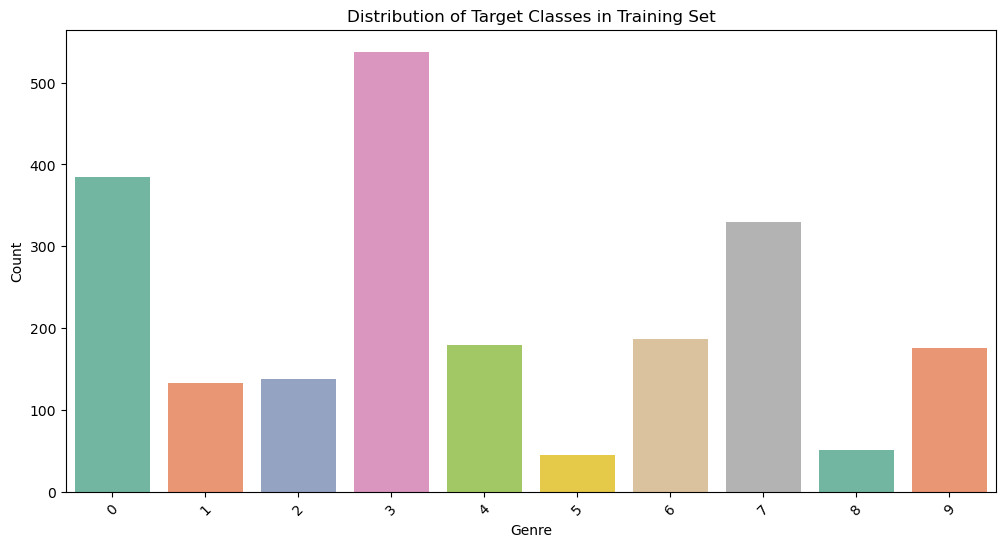

In [50]:
# Visualize the distribution of target classes in the training set
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, palette="Set2")
plt.title('Distribution of Target Classes in Training Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Model Building and Evaluation

The section will cover three key models: **K-Nearest Neighbors (KNN)**, **Support Vector Machine (SVM)**, and **Logistic Regression.**

#### SVM

SVM aims to find the hyperplane that maximizes the margin between different classes, and can handle non-linearly separable data through the use of kernel functions; it is effective in high-dimensional spaces but computationally intensive.

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

In [52]:
# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best Score: 0.3344031967001805


In [53]:
# Initialize SVM model with class weights
svm = SVC(class_weight='balanced', kernel='rbf', C=1, random_state=42)  # You can use 'linear', 'rbf', etc.

In [54]:
# Train the model
svm.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', random_state=42)

In [55]:
# Predict on the test set
y_pred_svm = svm.predict(X_test)

In [56]:
# Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.24444444444444444


In [57]:
# Classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm, zero_division=0))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.12      0.17        98
           1       0.12      0.21      0.15        34
           2       0.19      0.11      0.14        36
           3       0.44      0.29      0.35       141
           4       0.28      0.10      0.14        51
           5       0.12      0.18      0.15        17
           6       0.37      0.65      0.47        48
           7       0.13      0.03      0.04        75
           8       0.09      0.33      0.14        12
           9       0.17      0.82      0.28        28

    accuracy                           0.24       540
   macro avg       0.22      0.28      0.20       540
weighted avg       0.28      0.24      0.23       540



#### INTERPRETATION

The classification report for the **SVM Model** shows varied performance across different classes. 

- For class 0, the model has a precision of 0.29, meaning that 29% of instances predicted as class 0 are correct, with a low recall of 0.12, indicating that only 12% of actual class 0 instances are correctly identified. This results in an F1-score of 0.17, suggesting a poor balance between precision and recall for this class.
- Class 1 has a precision of 0.12 and a recall of 0.21, leading to an F1-score of 0.15, which reflects the model's difficulty in accurately predicting this class.
- For class 2, the model's precision is 0.19 and recall is 0.11, resulting in an F1-score of 0.14, indicating poor performance.
- Class 3 has better performance with a precision of 0.44 and a recall of 0.29, leading to an F1-score of 0.35.
- Class 4 has a precision of 0.28 and a recall of 0.10, with an F1-score of 0.14.
- Class 5 shows a precision of 0.12, a recall of 0.18, and an F1-score of 0.15.
- Class 6 performs relatively well with a precision of 0.37 and a recall of 0.65, yielding an F1-score of 0.47.
- Class 7 has a precision of 0.13 and a recall of 0.03, resulting in a low F1-score of 0.04.
- Class 8 has a precision of 0.09 and a recall of 0.33, leading to an F1-score of 0.14.
- Class 9 shows a precision of 0.17 and a high recall of 0.82, resulting in an F1-score of 0.28.

Overall, the model has an accuracy of 0.24, with a macro average F1-score of 0.20 and a weighted average F1-score of 0.23, indicating that the model has substantial room for improvement across most classes.

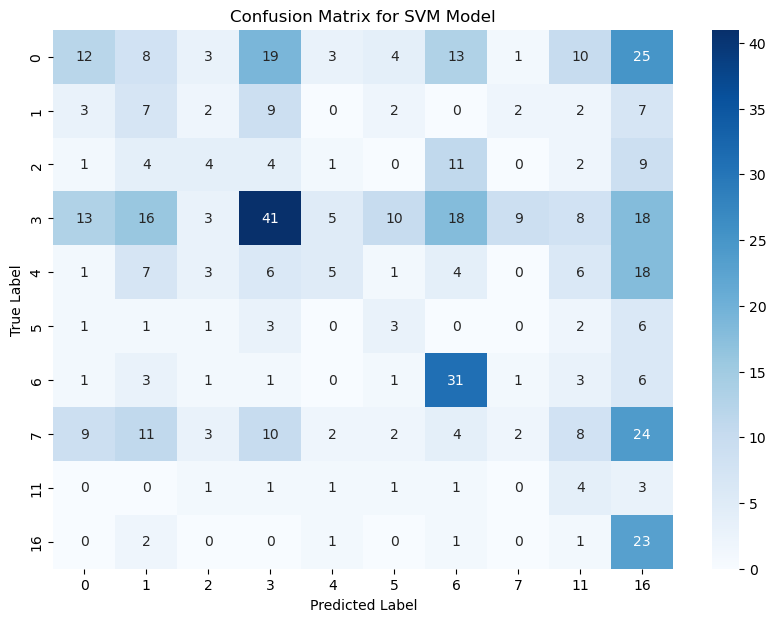

In [58]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### INTERPRETATION

Based on the diagonal values, the model seems to have a decent accuracy for some classes like 3, 6, and 16, but struggles with others like 0, 1, and 2.

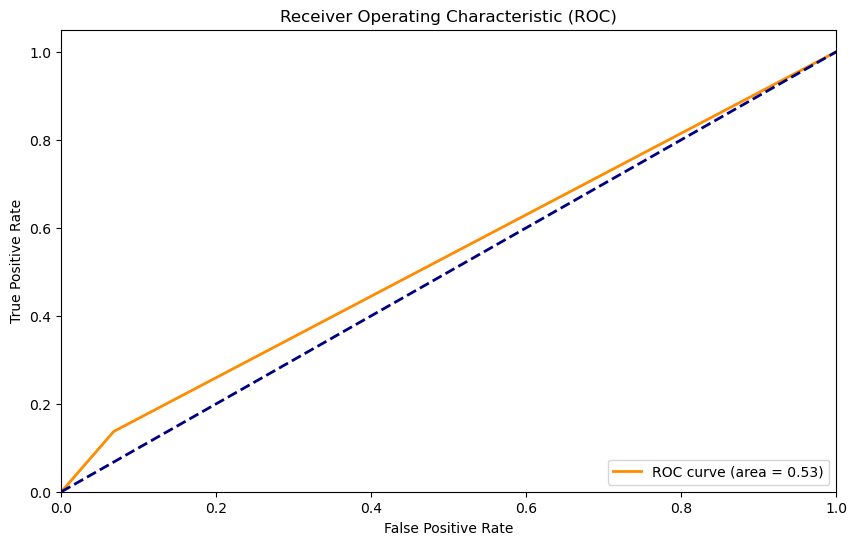

In [59]:
# Binarize the output labels for ROC curve (if more than 2 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred_svm, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### INTERPRETATION

An AUC (Area Under the Curve) score of 0.53 indicates that the model is slightly better than random guessing but still has poor performance in distinguishing between the positive and negative classes.

### Logistic Regression

Logistic Regression, a statistical method for binary classification, estimates class probabilities using a logistic function and assumes a linear relationship between features and the log-odds of the target, with regularization techniques available to prevent overfitting.

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [61]:
# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Define the parameter grid for regularization parameter and penalty
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.3024533814557016


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _

In [62]:
# Initialize the logistic regression model
logistic_regression = LogisticRegression(
    C=10,                  # Regularization parameter
    penalty='l2',           # Type of regularization
    random_state=42,        # Seed for reproducibility
    max_iter=1000           # Maximum number of iterations for convergence
)

In [63]:
# Fit the model
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42)

In [64]:
# Predict the test set
y_pred_logreg = logistic_regression.predict(X_test)

In [65]:
# Evaluate the model
accuracy_score(y_test, y_pred_logreg)

0.32222222222222224

In [66]:
print("Classification Report:\n", classification_report(y_test, y_pred_logreg,zero_division=0))

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.12      0.17        98
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        36
           3       0.33      0.80      0.47       141
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        17
           6       0.43      0.67      0.52        48
           7       0.24      0.20      0.22        75
           8       0.00      0.00      0.00        12
           9       0.11      0.07      0.09        28

    accuracy                           0.32       540
   macro avg       0.14      0.19      0.15       540
weighted avg       0.22      0.32      0.23       540



#### INTERPRETATION

The classification report for the **Logistic Regression Model** reveals varying performance across different classes. 

- For class 0, the model has a precision of 0.29 and a recall of 0.12, resulting in an F1-score of 0.17, indicating a limited ability to identify class 0 instances.
- Class 1 shows poor performance with a precision, recall, and F1-score all at 0.00, meaning the model fails to identify any instances of this class correctly.
- Similarly, class 2 also has a precision, recall, and F1-score of 0.00, indicating complete misclassification of this class.
- Class 3 has better performance with a precision of 0.33 and a recall of 0.80, leading to an F1-score of 0.47, suggesting the model has some ability to detect this class.
- Class 4, despite having a precision of 0.00, has a recall of only 0.00 and an F1-score of 0.00, indicating the model rarely identifies instances of this class.
- Class 5 shows no correct predictions with precision, recall, and F1-score all at 0.00.
- Class 6 performs relatively well with a precision of 0.43 and a recall of 0.67, yielding an F1-score of 0.52, indicating better detection and correct classification for this class.
- Class 7 has a precision of 0.24 and a recall of 0.20, resulting in an F1-score of 0.22, showing modest performance.
- Class 8, like classes 1, 2, and 5, has precision, recall, and F1-score all at 0.00, indicating no correct predictions.
- Class 9 shows a precision of 0.11 and a low recall of 0.07, leading to an F1-score of 0.09, reflecting poor performance in identifying this class.

Overall, the model has an accuracy of 0.32, with a macro average F1-score of 0.15 and a weighted average F1-score of 0.23. These metrics highlight that the model's performance is generally poor, with significant room for improvement, especially in correctly classifying underrepresented classes.

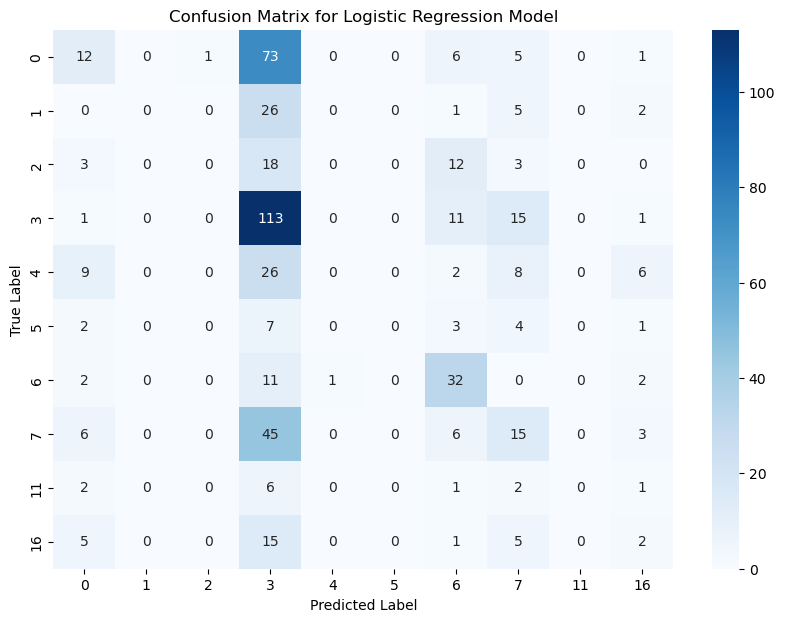

In [67]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### INTERPRETATION

There's a noticeable diagonal dominance, especially for classes 3 and 6, suggesting the model performs relatively well for these classes. 

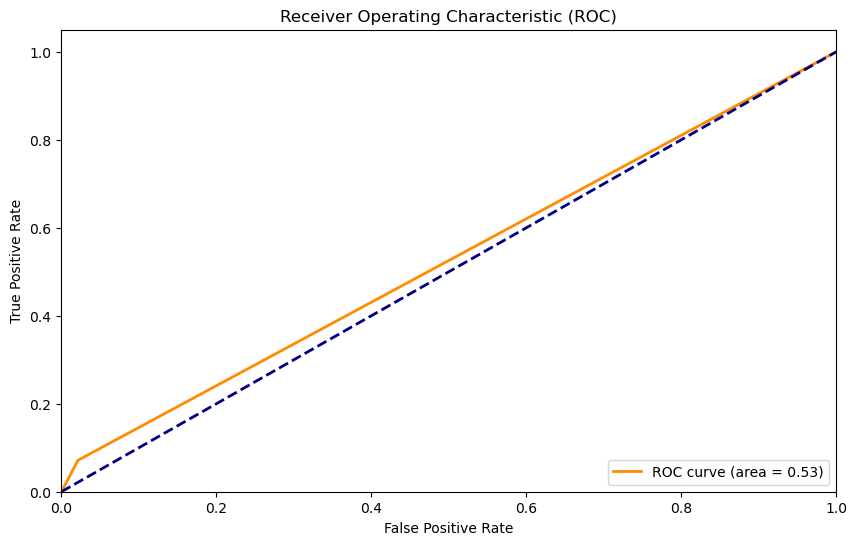

In [68]:
# Binarize the output labels for ROC curve (if more than 2 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred_logreg, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### INTERPRETATION

An AUC (Area Under the Curve) score of 0.53 indicates that the model has a very limited ability to distinguish between the positive and negative classes, performing only slightly better than random guessing.

### KNN Classifier

KNN is a simple, instance-based learning algorithm where the class of a data point is determined by the majority class among its k nearest neighbors, with performance dependent on the choice of distance metric and the number of neighbors. 

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [70]:
# Ensure n_neighbors is valid
n_neighbors = min(20, len(X_train))  # Set n_neighbors to a valid number
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [71]:
# Train the kNN model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [72]:
# Predict and evaluate
y_pred_knn = knn.predict(X_test)

In [73]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn, zero_division=0))

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.22      0.22        98
           1       0.00      0.00      0.00        34
           2       0.25      0.08      0.12        36
           3       0.42      0.68      0.52       141
           4       0.11      0.04      0.06        51
           5       0.00      0.00      0.00        17
           6       0.51      0.65      0.57        48
           7       0.19      0.09      0.12        75
           8       0.00      0.00      0.00        12
           9       0.19      0.54      0.28        28

    accuracy                           0.33       540
   macro avg       0.19      0.23      0.19       540
weighted avg       0.26      0.33      0.27       540



#### INTERPRETATION

The classification report for the **KNN Model** indicates mixed performance across different classes:

- For class 0, the model has a precision of 0.22, a recall of 0.22, and an F1-score of 0.22, suggesting moderate performance in identifying instances of this class.
- Class 1 shows poor performance with a precision, recall, and F1-score all at 0.00, indicating that the model fails to correctly identify any instances of this class.
- Class 2 has a precision of 0.25 and a recall of 0.08, resulting in an F1-score of 0.12, reflecting limited ability to classify this class accurately.
- Class 3 performs better, with a precision of 0.42, a recall of 0.68, and an F1-score of 0.52, indicating a relatively strong performance in detecting this class.
- Class 4 has a precision of 0.11, a recall of 0.04, and an F1-score of 0.06, suggesting poor identification of this class.
- Class 5 shows no correct predictions with precision, recall, and F1-score all at 0.00.
- Class 6 performs relatively well with a precision of 0.51, a recall of 0.65, and an F1-score of 0.57, showing decent detection and correct classification for this class.
- Class 7 has a precision of 0.19, a recall of 0.09, and an F1-score of 0.12, indicating modest performance.
- Class 8, like classes 1 and 5, has precision, recall, and F1-score all at 0.00, showing no correct predictions.
- Class 9 shows a precision of 0.19, a recall of 0.54, and an F1-score of 0.28, indicating reasonable performance in identifying this class.

Overall, the model has an accuracy of 0.33, with a macro average F1-score of 0.19 and a weighted average F1-score of 0.27. These metrics highlight that while the model performs reasonably well for some classes, it struggles significantly with others.

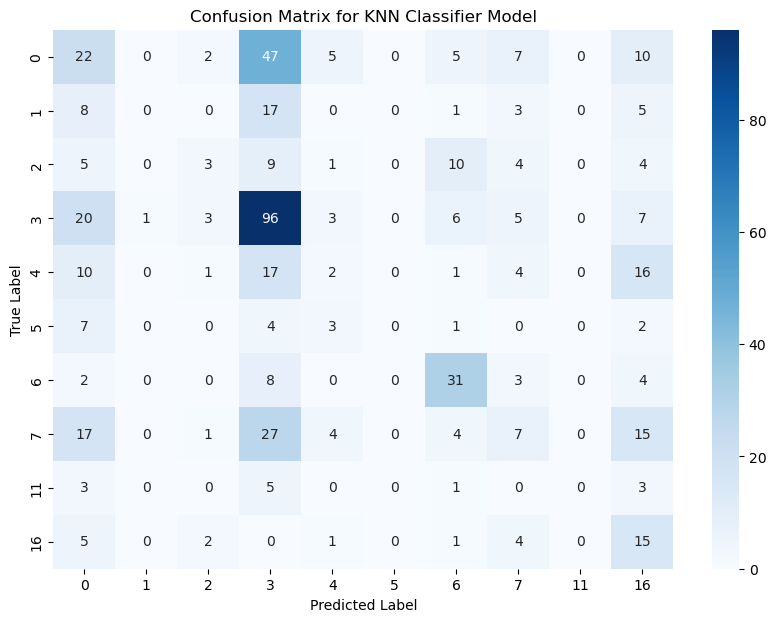

In [74]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for KNN Classifier Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### INTERPRETATION

The diagonal elements (top-left to bottom-right) represent correct predictions. There's a noticeable diagonal dominance, especially for classes 3 and 6, suggesting the model performs relatively well for these classes.

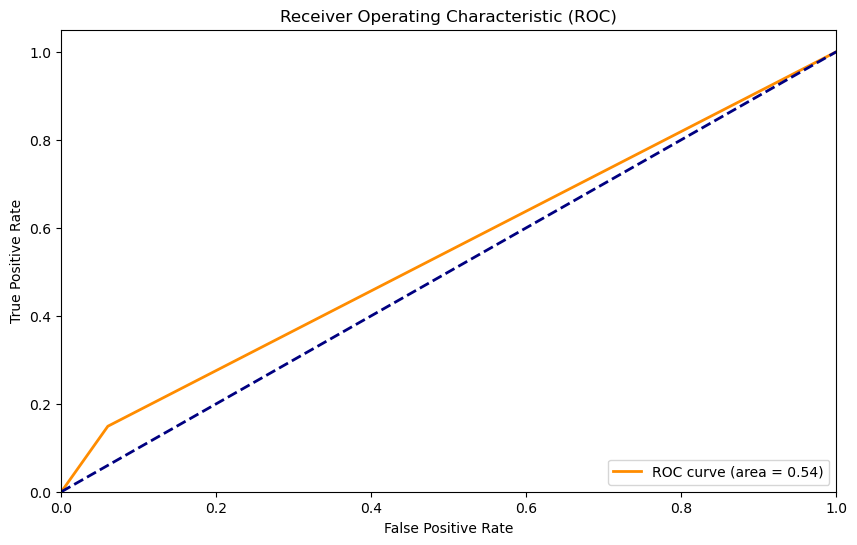

In [75]:
# Binarize the output labels for ROC curve (if more than 2 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred_knn, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### INTERPRETATION

An AUC score of 0.54 indicates that the model has a modest ability to distinguish between the positive and negative classes, but its performance is not strong. It is only slightly better than random guessing.

#### Training KNN Classifier with different k values

In [76]:
# List of k values to test
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

In [77]:
# Test k values
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

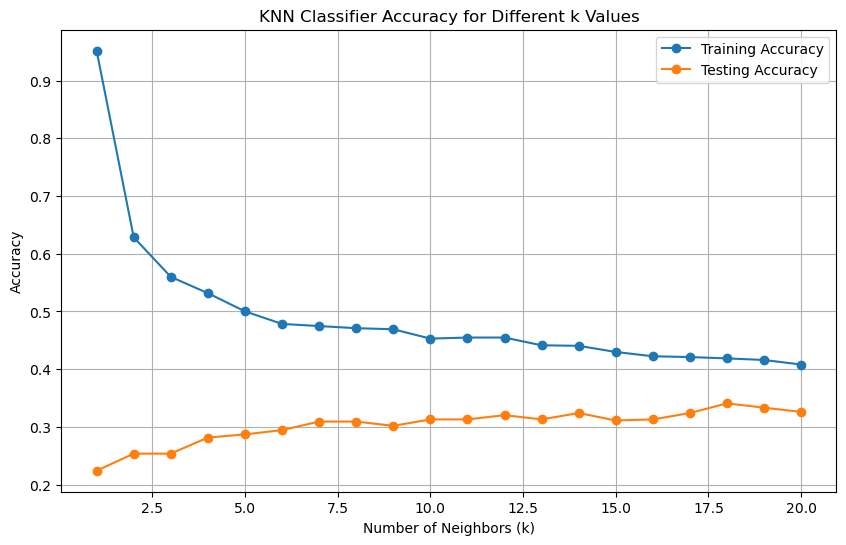

In [78]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Define a list of k values to experiment with
k_values = [3, 5, 7, 9, 10, 12]

# Perform cross-validation for each value of k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
    print(f"Average accuracy for k={k}: {np.mean(scores)}")

Average accuracy for k=3: 0.27466593623786195
Average accuracy for k=5: 0.29920189911489214
Average accuracy for k=7: 0.30430415914754666
Average accuracy for k=9: 0.31727571539056465
Average accuracy for k=10: 0.31078026982899376
Average accuracy for k=12: 0.31866567843946036


### MODEL COMPARISON

In [80]:
# Generate classification reports
report_svm = classification_report(y_test, y_pred_svm, zero_division=0, output_dict=True)
report_logreg = classification_report(y_test, y_pred_logreg, zero_division=0, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, zero_division=0, output_dict=True)

C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

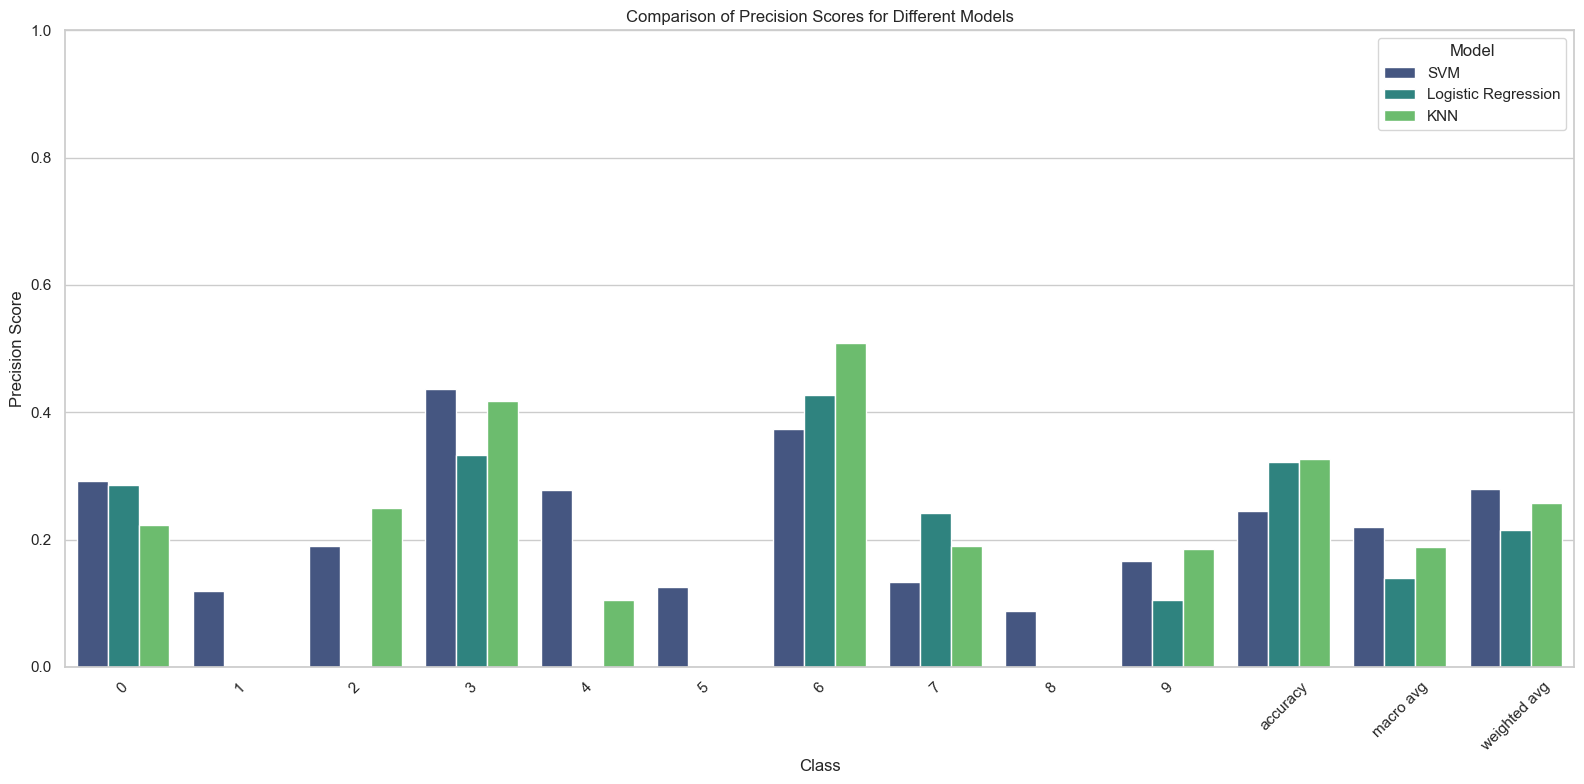

In [81]:
# Convert reports to DataFrames
def precision_to_df(report, model_name):
    # Extract only precision for each class and convert to DataFrame
    precision_df = pd.DataFrame(report).transpose()[['precision']]
    precision_df['Model'] = model_name
    precision_df = precision_df.reset_index().rename(columns={'index': 'Class', 'precision': 'Precision'})
    return precision_df

df_svm = precision_to_df(report_svm, 'SVM')
df_logreg = precision_to_df(report_logreg, 'Logistic Regression')
df_knn = precision_to_df(report_knn, 'KNN')

# Combine DataFrames
df_combined = pd.concat([df_svm, df_logreg, df_knn])

# Set plot style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(16, 8))

# Plot Precision for each class across models
sns.barplot(x='Class', y='Precision', hue='Model', data=df_combined, palette='viridis')

# Add titles and labels
plt.title('Comparison of Precision Scores for Different Models')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.ylim(0, 1)
plt.legend(title='Model')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### INTERPRETATION

**SVM Model**

The SVM model shows varied performance across different classes. The precision and recall metrics indicate that the model has difficulty accurately identifying several classes, often predicting incorrect instances as correct and missing many true instances. Some classes are identified with moderate accuracy, but overall, the model struggles with many categories, especially those with fewer instances. The F1-scores reflect this imbalance, indicating the need for improvement in the model's predictive capabilities. The overall accuracy of 30% suggests that the model's performance is generally limited.

**Logistic Regression Model**

The Logistic Regression model exhibits even more pronounced challenges. For several classes, the model fails to identify some instances correctly, leading to precision, recall, and F1-scores of 0.00. This indicates a complete misclassification for these classes. Some classes are predicted with moderate success, but the overall performance is poor. The model's accuracy of 28% and low F1-scores across most classes highlight the significant room for improvement and the necessity for different approaches or tuning.

**KNN Classifier**

The KNN model demonstrates mixed performance. While some classes are predicted with moderate accuracy, many classes suffer from low precision and recall, indicating that the model often misclassifies instances and fails to identify true instances correctly. The F1-scores for these classes are generally low, though some classes show relatively better performance. The overall accuracy of 38% suggests that the model performs better than SVM and Logistic Regression but still faces significant challenges in accurately predicting many classes.

All models were able to classify classes 3 and 6, which are Biography and Documentary, respectively. This suggests that these 2 genres have unique or prominent features in the dataset that differentiate them from other genres. These features could include specific keywords, narrative structures, themes, or even specific ratings and reviews patterns.

Overall, KNN shows the best general performance, followed by SVM, with Logistic Regression performing the worst. The average accuracy for the KNN classifier with k=9 is 0.312. This indicates that the best performance for the KNN model is achieved with k=9. However, all models indicate a substantial need for improvement, especially in terms of accurately predicting underrepresented classes and enhancing overall predictive accuracy.

# SUMMARY OF RESULTS


To analyze the different IMDb Movie Genres, optimal clustering, genre rating patters via association rule mining, and predictive model evaluation were done by the proponents.

Based on the findings, the optimal number of clusters (k) is 10. This conclusion is supported by the peak in the Silhouette Score and the lowest value of the Davies-Bouldin Index at k = 10, providing strong evidence for this optimal clustering. This indicates that the clusters are most distinct and compact when there are 10 clusters.

Additionally, the analysis employed association rule mining to identify patterns in movie ratings and genres on IMDb. The results show that the genre with the highest average IMDb ratings is Biography, indicating that movies classified as Biography tend to receive the highest viewer ratings. Association rules helped uncover these insights by examining the relationships between genres and their corresponding ratings, highlighting the genres that consistently perform well in terms of audience satisfaction.

Furthermore, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Logistic Regression were used to assess performance in predicting genres based on provided attributes. All models had difficulty predicting the majority of the classes except for classes 3 and 6, which are Biography and Documentary, respectively. This suggests that these two genres have unique or prominent features in the dataset that differentiate them from other genres. Overall, KNN showed the best general performance, followed by SVM, with Logistic Regression performing the worst. The average accuracy for the KNN classifier with k=9 is 0.317, indicating that the best performance for the KNN model is achieved with k=9.

# CONCLUSION


Through optimal clustering, association rule mining, and predictive modeling, several key findings emerged during the analysis of IMDb movie genres in the dataset. 

First and foremost, the optimal number of clusters was determined to be 10 based on the peak in the Silhouette Score and the lowest Davies-Bouldin Index. This indicates that the dataset is most effectively segmented into 10 distinct and compact clusters. This, therefore, supports the adequacy of only considering the top 10 genres for modeling purposes. On the other hand, the association rule mining revealed that the Biography genre consistently receives the highest average IMDb ratings which highlights its strong appeal among viewers. This finding underscores the genre's prominent position in terms of audience satisfaction. 

This was also further supported in the predictive modeling, in which results suggest Biography and Documentary have more distinctive features in the dataset that enhance prediction accuracy. It was also presented that the K-Nearest Neighbors (KNN) classifier outperformed Support Vector Machine (SVM) and Logistic Regression in predicting genres. KNN achieved the highest accuracy of 33%  with  k=9. Logistic Regression followed with 32% accuracy, while SVM lagged with 24% accuracy. 

In conclusion, the findings align with the exploratory data analysis (EDA) and clustering results, which showed that Biography is the most prevalent genre in the dataset. This comprehensive analysis highlights the importance of genre-specific characteristics and demonstrates the effectiveness of KNN for genre classification in the IMDb dataset.


# RECOMMENDATIONS

Based on the comprehensive analysis of the IMDb movie genres, we can infer and create different recommendations based on the results and possible improvements to the model performance.

We could have extracted more meaningful features from the dataset, which may have improved the model's accuracy. Instead of taking the top 10 genres, it would have been possible to take genres with a minimum amount to help the predictive models accurately classify genres with limited counts or observations. Another way to handle the genre imbalance would have been to use SMOTE, an oversampling technique that creates more samples based on the existing data of the smaller-count genres. Overall a larger sample size or data set would've helped this project greatly.











# REFERENCES
